1. Introduction

In this assignment, I am analyzing the Ebola outbreak dataset (2014–2016). My goals are:

To study how the number of Ebola cases and deaths changed over time

To compare which countries were most affected

To conclude with insights on outbreak trends and control


## Step 1: Installing KaggleHub  

I am installing the `kagglehub` library, which allows me to directly download datasets from Kaggle into my notebook.  


In [22]:
# I am installing kagglehub so that I can directly fetch the dataset from Kaggle
!pip install kagglehub



## Step 2: Importing Required Libraries  

Here, I am importing Python libraries for data handling and visualization:  
- **pandas** and **numpy** → for data analysis and numerical operations  
- **matplotlib** and **seaborn** → for static plots  
- **plotly.express** → for interactive plots  
- **datetime** → to work with dates  
- **os** → to access files in the system  


In [23]:
# Importing the libraries I need for this analysis
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from datetime import datetime
import os

# Setting plot style for better visuals
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


## Step 3: Downloading the Dataset  

Using KaggleHub, I will download the Ebola dataset directly from Kaggle.  
This will give me access to the raw data stored in a `.csv` file.  


In [24]:
# Using kagglehub to download the dataset
path = kagglehub.dataset_download("imdevskp/ebola-outbreak-20142016-complete-dataset")

# I am printing the dataset path to see where it is stored
print("Path to dataset:", path)

# Checking which files are available in the downloaded dataset
os.listdir(path)


Using Colab cache for faster access to the 'ebola-outbreak-20142016-complete-dataset' dataset.
Path to dataset: /kaggle/input/ebola-outbreak-20142016-complete-dataset


['ebola_data_db_format.csv', 'ebola_2014_2016_clean.csv']

## Step 4: Loading the Dataset  

Now, I will load the dataset into a **pandas DataFrame** and display the first few rows to understand its structure.  


In [25]:
# Loading the main Ebola CSV file
df = pd.read_csv(path + "/ebola_2014_2016_clean.csv")

# Displaying the first 5 rows to get an idea of the dataset
df.head()


,Country,Date,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,648.0,430.0
1,Nigeria,2014-08-29,19.0,7.0
2,Sierra Leone,2014-08-29,1026.0,422.0
3,Liberia,2014-08-29,1378.0,694.0
4,Sierra Leone,2014-09-05,1261.0,491.0


## Step 5: Exploring the Dataset  

In this step, I will:  
- Check the size (rows & columns)  
- Look at column names and data types  
- Check for missing values  
- Generate summary statistics  

This helps me understand the dataset before cleaning.  


In [26]:
# Checking dataset shape (rows, columns)
print("Shape of dataset:", df.shape)

# Displaying column names and data types
df.info()

# Checking for missing values
df.isnull().sum()

# Getting statistical summary of the dataset
df.describe()


Shape of dataset: (2485, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485 entries, 0 to 2484
Data columns (total 4 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Country                                                     2485 non-null   object 
 1   Date                                                        2485 non-null   object 
 2   Cumulative no. of confirmed, probable and suspected cases   2477 non-null   float64
 3   Cumulative no. of confirmed, probable and suspected deaths  2485 non-null   float64
dtypes: float64(2), object(2)
memory usage: 77.8+ KB


,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
count,2477.000000,2485.000000
mean,2553.678644,1028.347686
std,4427.118148,1656.064372
min,0.000000,0.000000
25%,1.000000,0.000000
50%,8.000000,6.000000
75%,3657.000000,2386.000000
max,14122.000000,4806.000000


## Step 6: Data Cleaning  

Here, I am preparing the dataset for analysis:  
- Filling missing values with `0` (since cases/deaths cannot be left empty)  
- Converting the **Date** column into proper datetime format  
- Checking the list of countries included in the dataset  


In [27]:
# Filling missing values with 0 because Ebola case counts cannot be NaN
df = df.fillna(0)

# Converting 'Date' column to datetime format for time-based analysis
df['Date'] = pd.to_datetime(df['Date'])

# Checking unique countries reported in the dataset
df['Country'].unique()


array(['Guinea', 'Nigeria', 'Sierra Leone', 'Liberia', 'Senegal',
       'United States of America', 'Spain', 'Mali', 'United Kingdom',
       'Italy'], dtype=object)

## Step 7.1: Total Ebola Cases Over Time  

This line chart shows the trend of **cumulative Ebola cases** from 2014 to 2016.  
It helps me visualize how quickly the outbreak spread over time.  


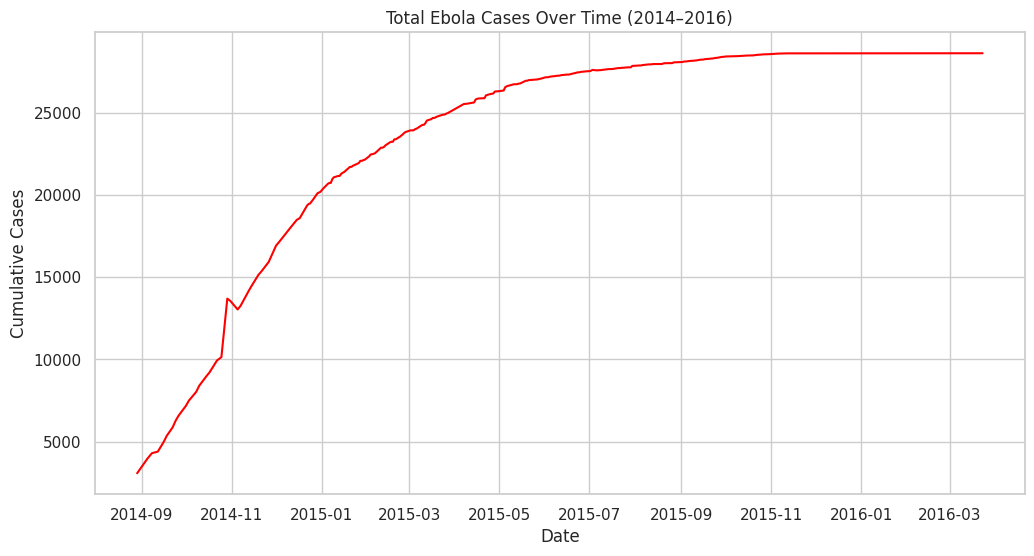

In [28]:
# Grouping cases by date to see the total trend of Ebola spread
cases_time = df.groupby('Date')['Cumulative no. of confirmed, probable and suspected cases'].sum().reset_index()

plt.plot(cases_time['Date'], cases_time['Cumulative no. of confirmed, probable and suspected cases'], color='red')
plt.title("Total Ebola Cases Over Time (2014–2016)")
plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
plt.show()


## Step 7.2: Total Ebola Deaths Over Time  

This plot shows the **cumulative number of deaths** caused by Ebola over time.  
By comparing it with the previous chart, I can observe how deadly the outbreak was.  


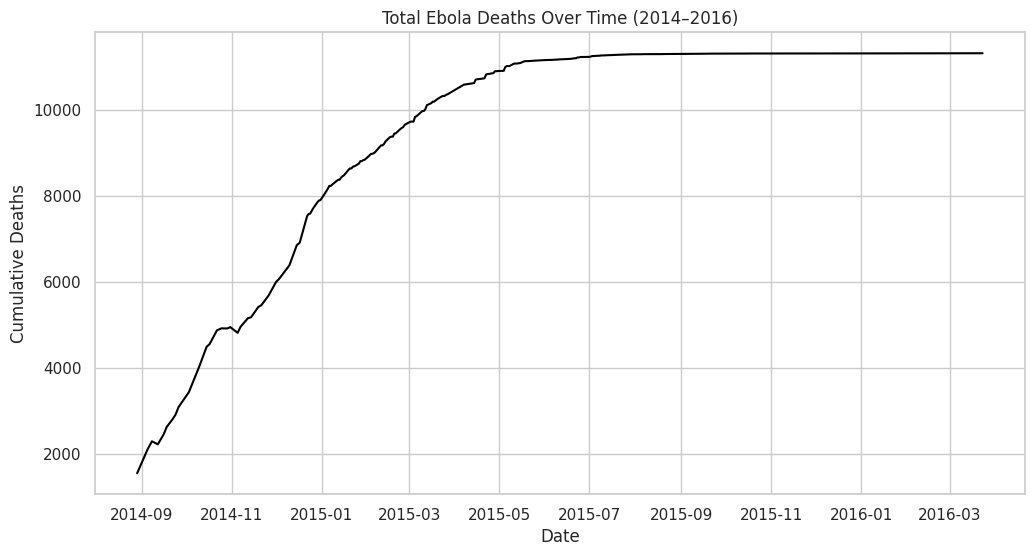

In [29]:
# Grouping deaths by date to check how fatal Ebola was during the outbreak
deaths_time = df.groupby('Date')['Cumulative no. of confirmed, probable and suspected deaths'].sum().reset_index()

plt.plot(deaths_time['Date'], deaths_time['Cumulative no. of confirmed, probable and suspected deaths'], color='black')
plt.title("Total Ebola Deaths Over Time (2014–2016)")
plt.xlabel("Date")
plt.ylabel("Cumulative Deaths")
plt.show()


## Step 7.3: Country-wise Ebola Cases  

Here, I use a bar chart to compare the **total cumulative cases** across different countries.  
This makes it clear which countries were most severely affected by the outbreak.  


In [30]:
# Comparing cases between countries to see which were worst affected
cases_country = df.groupby('Country')['Cumulative no. of confirmed, probable and suspected cases'].max().reset_index()
cases_country = cases_country.sort_values(by='Cumulative no. of confirmed, probable and suspected cases', ascending=False)

fig = px.bar(cases_country,
             x='Country',
             y='Cumulative no. of confirmed, probable and suspected cases',
             title="Cumulative Ebola Cases by Country (2014–2016)",
             color='Cumulative no. of confirmed, probable and suspected cases',
             text='Cumulative no. of confirmed, probable and suspected cases')
fig.update_layout(xaxis_title="Country", yaxis_title="Number of Cases")
fig.show()


## Step 7.4: Deaths vs Cases by Country  

This scatter plot shows the relationship between **total cases and deaths** for each country.  
Countries with higher cases also had higher deaths, which shows Ebola’s high fatality rate.  


In [31]:
# Making a scatter plot to compare deaths and cases country by country
country_stats = df.groupby('Country').agg({
    'Cumulative no. of confirmed, probable and suspected cases': 'max',
    'Cumulative no. of confirmed, probable and suspected deaths': 'max'
}).reset_index()

fig = px.scatter(country_stats,
                 x='Cumulative no. of confirmed, probable and suspected cases',
                 y='Cumulative no. of confirmed, probable and suspected deaths',
                 color='Country',
                 size='Cumulative no. of confirmed, probable and suspected cases',
                 hover_data=['Country'],
                 title="Deaths vs Cases by Country (2014–2016)")
fig.update_layout(xaxis_title="Total Cases", yaxis_title="Total Deaths")
fig.show()


### Why are only three countries shown in the time-series plots?

Although the dataset mentions several countries, the **majority of cases and deaths** occurred in **Liberia, Sierra Leone, and Guinea**.  
Other countries reported very few cases, so when plotted on the same scale, their numbers appear almost negligible.  
For clarity, the graphs focus on these three main countries, which were the **epicenter of the Ebola outbreak**.
### My Key Observations

1. Ebola cases rose very steeply during 2014–2015 before the outbreak slowed down.  
2. The three most affected countries were **Guinea, Liberia, and Sierra Leone**.  
3. Death counts follow case counts very closely, showing Ebola’s very high fatality rate.  
4. Other countries had cases, but compared to these three, they were much less impacted.  

### Conclusion (in my words)

This analysis clearly shows how the Ebola epidemic of 2014–2016 was one of the deadliest outbreaks in modern history.  
The data visualization highlights how quickly cases rose, how concentrated the outbreak was in West Africa, and how important international intervention was to bring the outbreak under control.  
